In [ ]:
!module purge
!module load apps/anaconda3
!module load compilers/nvidia/cuda/11.2
!module load compilers/gcc/8.3.0

In [ ]:

import cv2
import os
import random

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras


In [ ]:
tf.__version__

'2.8.0'

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
train_dir = "/home/191112024/splited_dataset/AGCCPF/train"
test_dir = "/home/191112024/splited_dataset/AGCCPF/test"
valid_dir = "/home/191112024/splited_dataset/AGCCPF/validate"


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
!unzip AGCCPF.zip

unzip:  cannot find or open AGCCPF.zip, AGCCPF.zip.zip or AGCCPF.zip.ZIP.


In [ ]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        )

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=20,
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        )

Found 5253 images belonging to 3 classes.
Found 1315 images belonging to 3 classes.
Found 1644 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200, 200, 3))


# conv_base = EfficientNetB7(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200, 200, 3))

# conv_base = DenseNet121(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

conv_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 100, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 100, 100, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(3, activation='softmax'))



In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "modelmobilenet.h5", save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True)


In [ ]:
model.summary(0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 18,315,331
Trainable params: 18,281,219
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=250,
                    epochs=200,
                    validation_data=valid_generator,
                    validation_steps=60,
                    callbacks=[checkpoint_cb])


Epoch 1/25
250/250 [==============================] - 134s 469ms/step - loss: 1.2055 - acc: 0.5021 - val_loss: 8.8494 - val_acc: 0.5325
Epoch 2/25
250/250 [==============================] - 114s 456ms/step - loss: 0.9505 - acc: 0.5396 - val_loss: 15.4769 - val_acc: 0.5308
Epoch 3/25
250/250 [==============================] - 112s 448ms/step - loss: 0.8943 - acc: 0.5640 - val_loss: 13.3280 - val_acc: 0.5242
Epoch 4/25
250/250 [==============================] - 115s 458ms/step - loss: 0.8571 - acc: 0.5912 - val_loss: 10.4948 - val_acc: 0.5292
Epoch 5/25
250/250 [==============================] - 113s 453ms/step - loss: 0.8112 - acc: 0.6277 - val_loss: 10.5852 - val_acc: 0.5258
Epoch 6/25
250/250 [==============================] - 116s 461ms/step - loss: 0.7698 - acc: 0.6533 - val_loss: 13.7455 - val_acc: 0.5325
Epoch 7/25
250/250 [==============================] - 115s 458ms/step - loss: 0.7319 - acc: 0.6705 - val_loss: 18.7741 - val_acc: 0.5317
Epoch 8/25
250/250 [======================

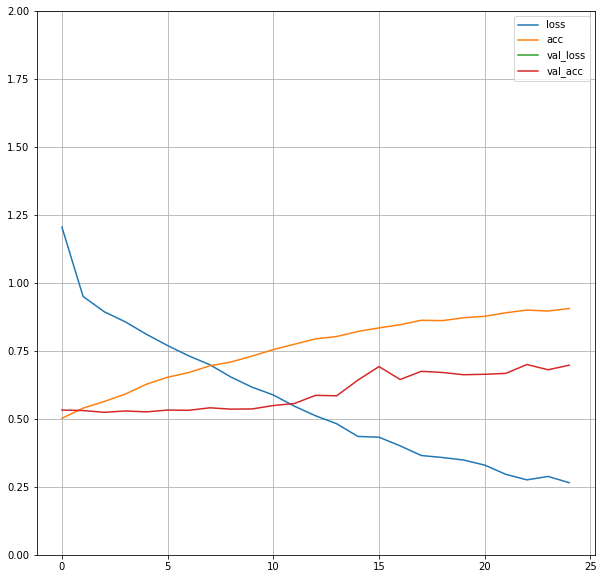

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.ylim((0,2))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(test_generator)

83/83 [==============================] - 15s 176ms/step - loss: 9.8300 - acc: 0.7032


[9.82998275756836, 0.7031630277633667]

In [ ]:
x=model.predict(test_generator)

In [ ]:
actual=test_generator.labels
actual

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
pred=np.argmax(x, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 35, 187,  66],
       [ 74, 570, 226],
       [ 39, 331, 116]])

In [ ]:
x=model.predict(train_generator)
actual=train_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

In [ ]:
x=model.predict(valid_generator)
actual=valid_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 12, 153,  66],
       [ 59, 460, 177],
       [ 27, 254, 107]])

In [ ]:
x=model.predict(test_generator)
actual=test_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 27, 186,  75],
       [ 85, 578, 207],
       [ 36, 324, 126]])